In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [17]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')


In [18]:

# Data Cleaning
print(train_df.info())
print(train_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [19]:
# Fill missing Age values with the median Age
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

C:\Users\DhanushRaja\AppData\Local\Temp\ipykernel_24704\297708757.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
C:\Users\DhanushRaja\AppData\Local\Temp\ipykernel_24704\297708757.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [20]:
# Drop the Cabin column since it has too many missing values
train_df.drop('Cabin', axis=1, inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)

Exploratory Data Analysis (EDA)

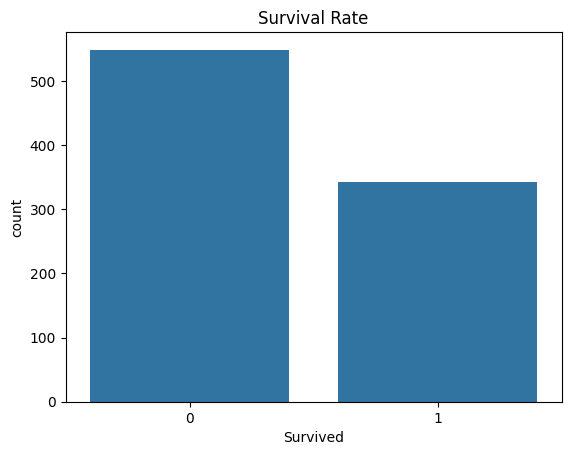

In [21]:
# 1. Survival Rate
sns.countplot(x='Survived', data=train_df)
plt.title('Survival Rate')
plt.show()


C:\Users\DhanushRaja\AppData\Local\Temp\ipykernel_24704\198822288.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['Age'], kde=False)


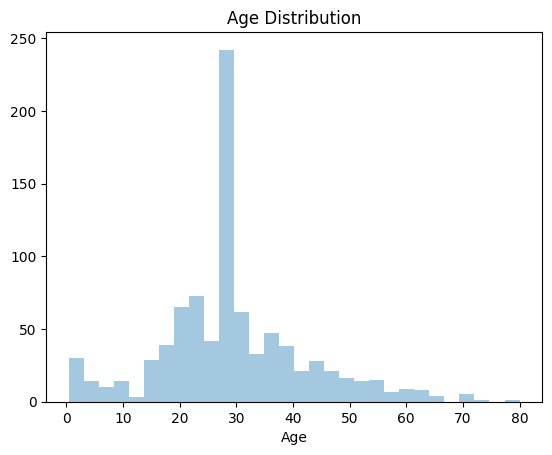

In [22]:
# 2. Age Distribution
sns.distplot(train_df['Age'], kde=False)
plt.title('Age Distribution')
plt.show()


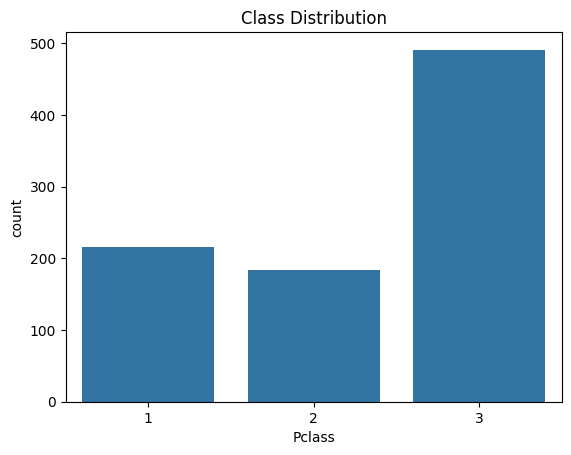

In [23]:
# 3. Class Distribution
sns.countplot(x='Pclass', data=train_df)
plt.title('Class Distribution')
plt.show()


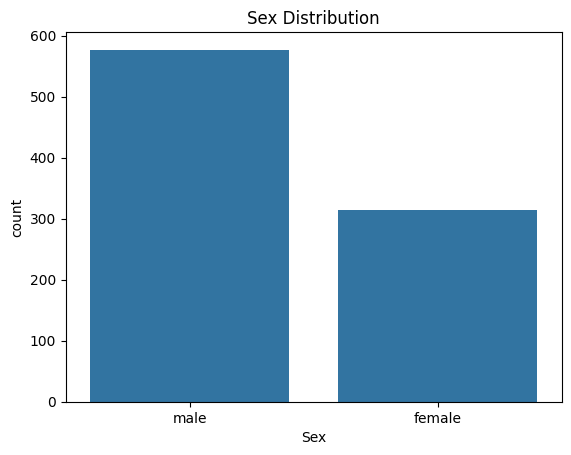

In [24]:
# 4. Sex Distribution
sns.countplot(x='Sex', data=train_df)
plt.title('Sex Distribution')
plt.show()


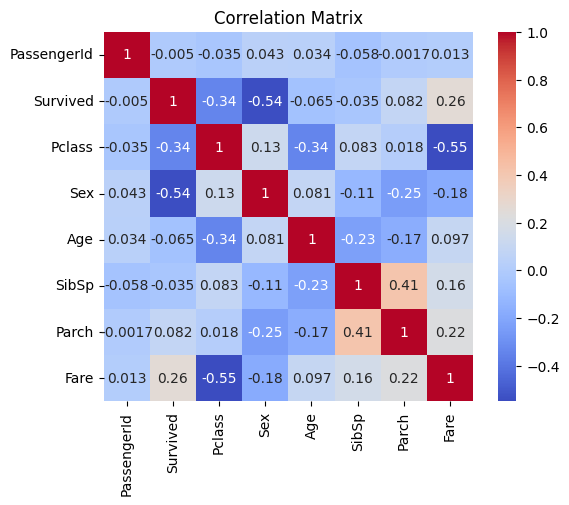

In [27]:
# Drop non-numeric columns for correlation calculation
numeric_cols = train_df.select_dtypes(include=[np.number])
corr_matrix = numeric_cols.corr()

# Plot the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


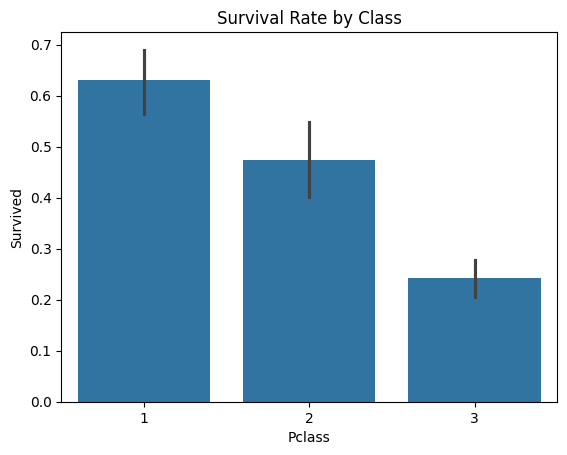

In [28]:
# 6. Survival Rate by Class
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('Survival Rate by Class')
plt.show()

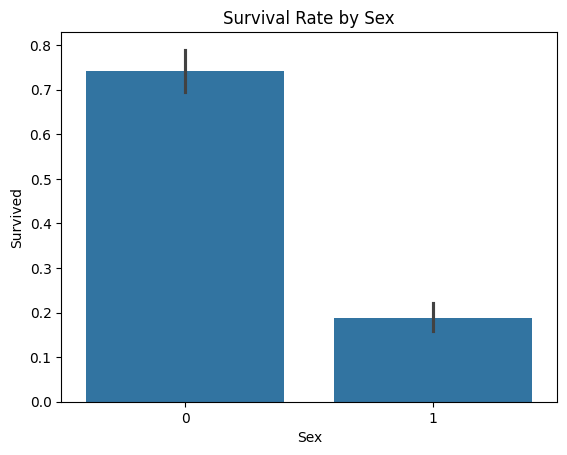

In [29]:
# 7. Survival Rate by Sex
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title('Survival Rate by Sex')
plt.show()